# Exercise 4

Use the dataset in *EFIplus_medit.zip*

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from statsmodels.graphics.gofplots import qqplot

df = pd.read_csv(os.getcwd() + '\..\..\Examples\EFIplus_medit.zip', compression='zip', sep=";")

 1. Take 1000 **random samples with replacement** of increasing sample sizes (e.g. 10, 50, 100, 150, 200, 250, 300, 500 and 1000 observations), compute the mean Temp_ann of each sample and use an appropriate visualization to show **how many samples will we need to have a good estimate of the population mean** (this is a corrected version of the last challenge of the previous exercise).

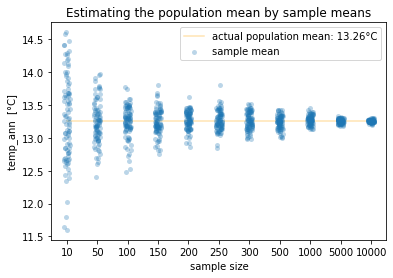

In [3]:
samplesizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000, 5000, 10000]
samplesizes = (samplesizes*100)[0:1000] 
sample_means=[]

for size in samplesizes:
    sample = df.sample(size, replace=True)
    sample_means.append(round(sample['temp_ann'].mean(),2))

# for comparison plot the actual population mean as a line
pmean = round(df['temp_ann'].mean(),2)
plt.plot([pmean]*11, alpha=.3, color='orange')

# plot the sample means
data = pd.DataFrame(list(zip(samplesizes,sample_means)), columns=['sample size', 'temp_ann'])
g = sns.stripplot(data, x='sample size', y='temp_ann', alpha=0.3)
g.set(ylabel='temp_ann  [°C]', title='Estimating the population mean by sample means')

plt.legend([f'actual population mean: {pmean}°C', 'sample mean'])

2. Using an appropriate visualization, check the **effect of Mean Annual Temperature** (*temp_ann*) **on the presence of** *Salmo trutta fario* (Brown Trout).

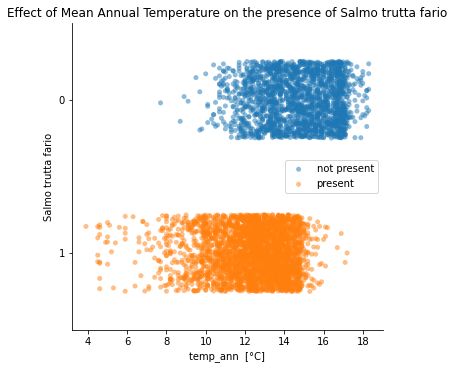

In [4]:
data = df[['temp_ann', 'Salmo trutta fario',]]
g = sns.catplot(data, x='temp_ann', y='Salmo trutta fario', hue='Salmo trutta fario', orient='h', jitter=.25, alpha=.5, legend=False)
g.set(title='Effect of Mean Annual Temperature on the presence of Salmo trutta fario', xlabel='temp_ann  [°C]')
plt.legend(['not present', 'present'], loc='center right')
plt.show()

--> It seems that the *Salmo trutta fario* **prefers** locations with **lower / colder** mean annual temperature.

[(3.0, 19.0), Text(0, 0.5, 'S. t. f. present')]

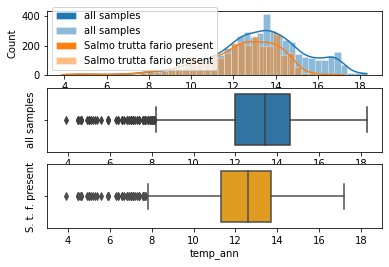

In [5]:
plt.subplot(3,1,1)
sns.histplot(df, x='temp_ann', edgecolor=(1, 1, 1, 0.4), kde=True, label='all samples')
sns.histplot(data[data['Salmo trutta fario']==1], x='temp_ann', edgecolor=(1, 1, 1, 0.4), kde=True, label='Salmo trutta fario present')
plt.legend()
plt.subplot(3,1,2)
sns.boxplot(df, x='temp_ann').set(xlim=(3,19), ylabel='all samples')
plt.subplot(3,1,3)
sns.boxplot(data[data['Salmo trutta fario']==1], x='temp_ann', color='orange').set(xlim=(3,19), ylabel='S. t. f. present')

3. Test, using both visualization and hypothesis testing methods, **if the** *actual_river_slope* **is drawn from a normal distribution**.

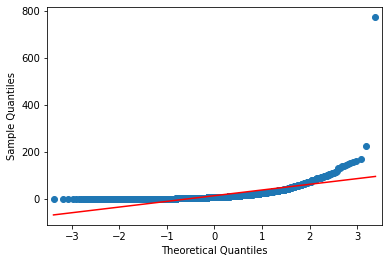

In [6]:
df2 = df.dropna()
# qqplot
data = df2['Actual_river_slope']
qqplot(data, line='s')
plt.show()

--> The qqplot indicates that the *actual_river_slope* is **not normally distributed**.

In [7]:
# hypothesis test
from scipy.stats import shapiro
print('H0: The sample was drawn from a Gaussian (=normal) distribution.')
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. 
alpha = 0.05
if p > alpha:
 print('actual_river_slope is normally distributed (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('actual_river_slope is not normally distributed (reject H0 with an error probability <0.05).')

H0: The sample was drawn from a Gaussian (=normal) distribution.
Statistics=0.480, p=0.000
actual_river_slope is not normally distributed (reject H0 with an error probability <0.05).


 4. Take 100 samples of 2000 **observations with replacement**, compute the mean for each sample and plot the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution.

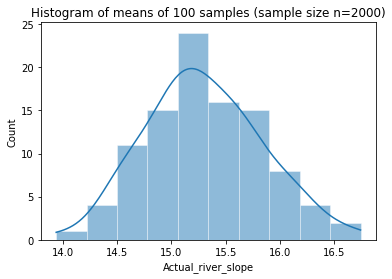

H0: The mean values are drawn from a normal distribution.
Statistics=0.994, p=0.918
Do NOT reject H0. The mean values are drawn from a normal distribution.


In [8]:
meanvalues =[]

for i in range(100):
    sample = df2.sample(2000, replace = True)
    meanvalues.append(round(sample['Actual_river_slope'].mean(),2))

sns.histplot(meanvalues, edgecolor=(1, 1, 1, 0.4), kde=True).set(xlabel='Actual_river_slope', title='Histogram of means of 100 samples (sample size n=2000)')
plt.show()
stat, p = shapiro(meanvalues)
print('H0: The mean values are drawn from a normal distribution.')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha: print('Do NOT reject H0. The mean values are drawn from a normal distribution.')
else: print('Reject H0. The mean values are NOT drawn from a normal distribution.')